# Importation des packages et du dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [2]:
df = pd.read_csv('../Dataset/TitanicData.csv')

In [3]:
df_raw = df.copy()

# Cleaning Dataset

In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

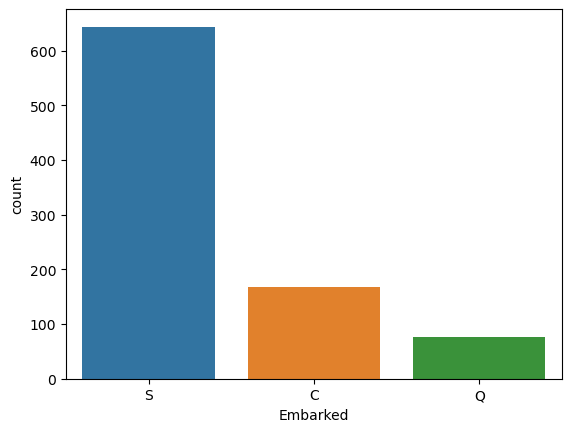

In [9]:
sns.countplot(x='Embarked', data = df)

In [10]:
df = df.drop(['PassengerId','Name', 'Ticket'], axis = 1)

In [11]:
df.isna().sum()/df.shape[0]

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

<Axes: >

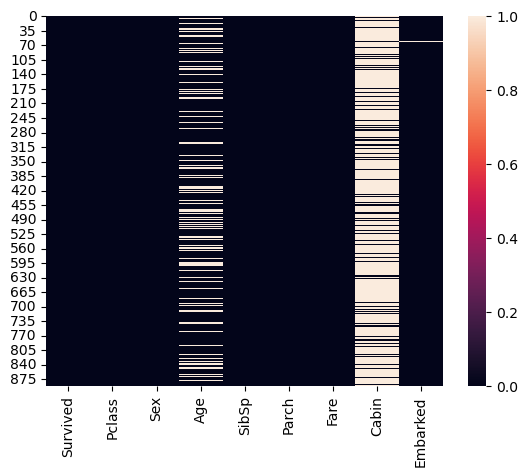

In [12]:
sns.heatmap(df.isna())

<Axes: >

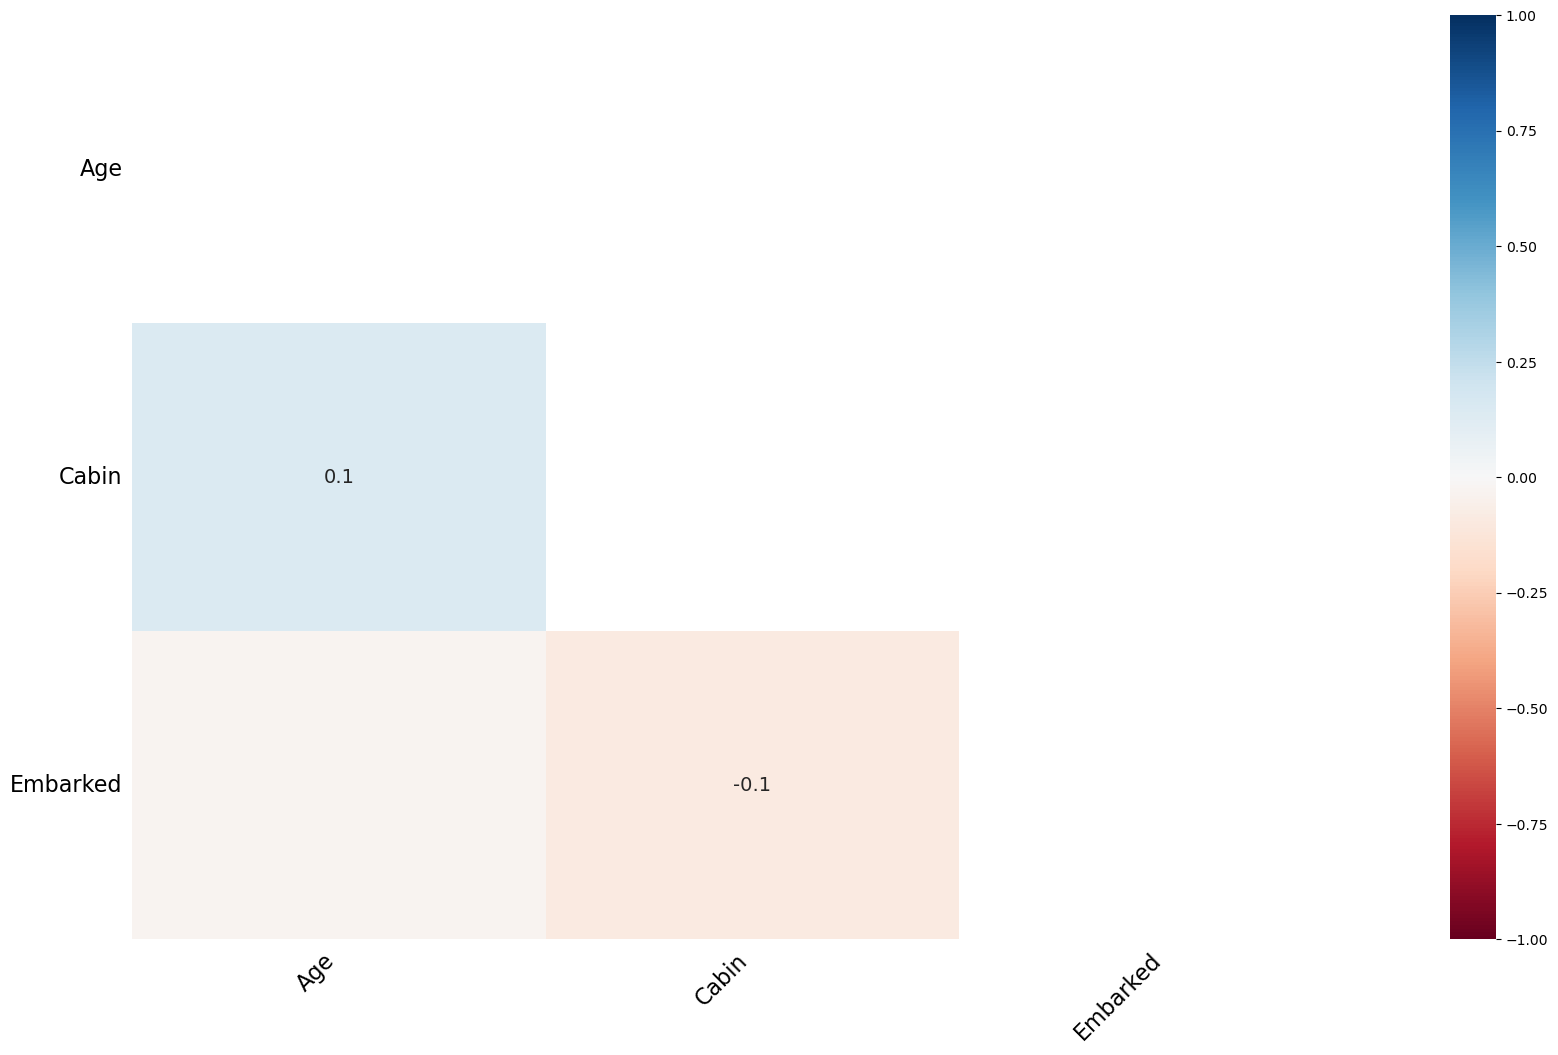

In [13]:
msno.heatmap(df)

In [14]:
df = df.drop(["Cabin"], axis = 1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Filling missing values

In [16]:
categorical_feature = ['Sex','Embarked']
numerical_feature = ['Survived','Pclass','Age','SibSp','Parch','Fare']

In [17]:
df[numerical_feature]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [18]:
Imputer = KNNImputer(n_neighbors = 3)

In [19]:
Knn_result = Imputer.fit_transform(df[numerical_feature])

In [20]:
serie_age = pd.DataFrame(Knn_result[:,2], columns = ['Age_knn'])

In [21]:
serie_age

,Age_knn
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,25.333333
889,26.000000


In [22]:
serie_age = serie_age.round()

In [23]:
serie_age

,Age_knn
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,25.0
889,26.0


In [24]:
serie_age = serie_age.astype(int)

In [25]:
df['Age'] = serie_age['Age_knn']

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,25,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


In [27]:
Imputer2 = SimpleImputer(strategy= 'most_frequent')

In [28]:
SpI_result = Imputer2.fit_transform(df[['Embarked']])

In [29]:
serie_SpI = pd.DataFrame(data = SpI_result, columns = ['Embarked'])

In [30]:
serie_SpI

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [31]:
df['Embarked'] = serie_SpI['Embarked']

<Axes: >

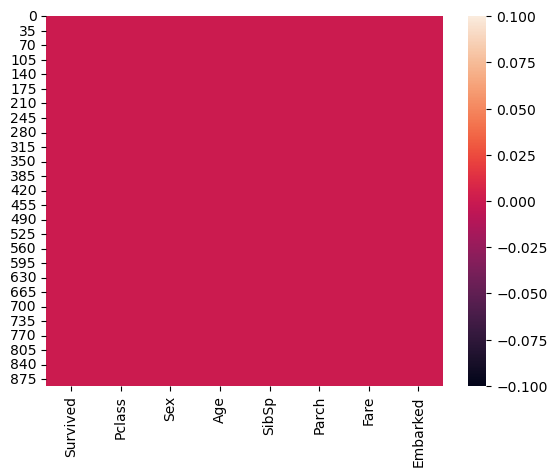

In [32]:
sns.heatmap(df.isna())

# Encoding

In [33]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform='pandas')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 52.3+ KB


In [35]:
ohe_result = ohe.fit_transform(df[['Sex','Embarked']])

In [36]:
ohe_result

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0
888,1.0,0.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0


In [37]:
df = pd.concat([df,ohe_result], axis = 1, ignore_index = False)

In [38]:
df.shape

(891, 13)

In [39]:
df.dtypes

Survived        int64
Pclass          int64
Sex            object
Age             int32
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
Sex_female    float64
Sex_male      float64
Embarked_C    float64
Embarked_Q    float64
Embarked_S    float64
dtype: object

In [40]:
df = df.drop(['Sex','Embarked'], axis = 1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    int32  
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    float64
 7   Sex_male    891 non-null    float64
 8   Embarked_C  891 non-null    float64
 9   Embarked_Q  891 non-null    float64
 10  Embarked_S  891 non-null    float64
dtypes: float64(6), int32(1), int64(4)
memory usage: 73.2 KB


In [42]:
df[["Pclass"]].replace([1,2,3],[3,2,1])

,Pclass
0,1
1,3
2,1
3,3
4,1
...,...
886,2
887,3
888,1
889,3


#  Outliers' Treatment

In [43]:
pd.set_option('display.max_row',None)
pd.set_option('display.max_columns', None)

In [44]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
5,0,3,24,0,0,8.4583,0.0,1.0,0.0,1.0,0.0
6,0,1,54,0,0,51.8625,0.0,1.0,0.0,0.0,1.0
7,0,3,2,3,1,21.0750,0.0,1.0,0.0,0.0,1.0
8,1,3,27,0,2,11.1333,1.0,0.0,0.0,0.0,1.0
9,1,2,14,1,0,30.0708,1.0,0.0,1.0,0.0,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
 

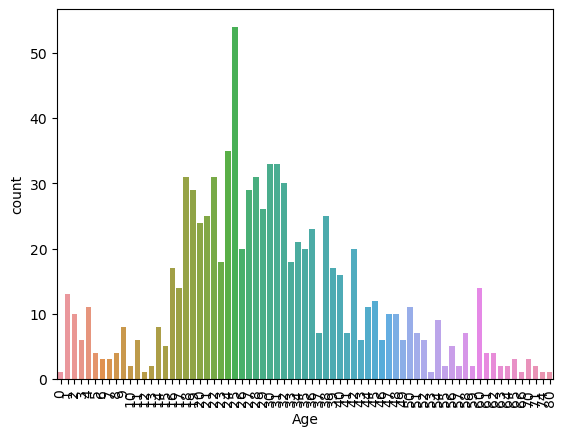

In [45]:
sns.countplot(x='Age', data = df)
plt.xticks(rotation=90)

<Axes: xlabel='Fare', ylabel='count'>

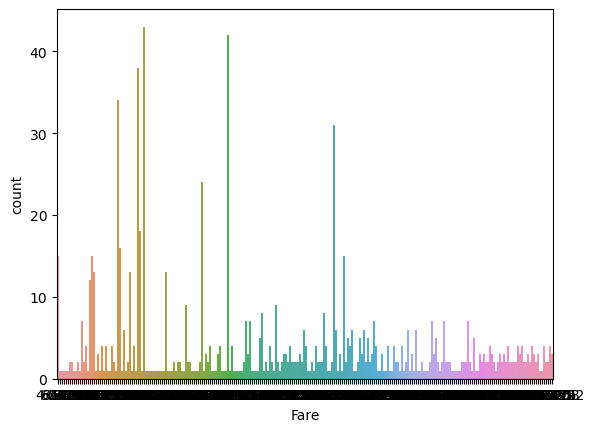

In [46]:
sns.countplot(x='Fare', data = df)

In [47]:
df['Age'].value_counts()

Age
25    54
24    35
30    33
31    33
22    31
18    31
28    31
32    30
27    29
19    29
29    26
38    25
21    25
20    24
36    23
34    21
42    20
26    20
35    20
23    18
33    18
16    17
39    17
40    16
17    14
60    14
1     13
45    12
44    11
50    11
4     11
2     10
47    10
48    10
54     9
9      8
14     8
41     7
58     7
37     7
51     7
11     6
49     6
3      6
46     6
52     6
43     6
15     5
56     5
61     4
62     4
5      4
8      4
65     3
7      3
70     3
6      3
10     2
71     2
59     2
63     2
64     2
13     2
55     2
57     2
80     1
0      1
12     1
53     1
66     1
74     1
Name: count, dtype: int64

In [48]:
z_scores = stats.zscore(df[["Age","Fare"]])

In [49]:
z_scores.shape

(891, 2)

In [50]:
z_scores

,Age,Fare
0,-0.580221,-0.502445
1,0.570055,0.786845
2,-0.292652,-0.488854
3,0.354378,0.420730
4,0.354378,-0.486337
5,-0.436437,-0.478116
6,1.720331,0.395814
7,-2.018067,-0.224083
8,-0.220760,-0.424256
9,-1.155359,-0.042956


In [51]:
abs_z_scores = abs(z_scores)

In [52]:
filtr_z_scores = (abs_z_scores < 3).all(axis=1)

In [53]:
type(filtr_z_scores)

pandas.core.series.Series

In [54]:
filtr_z_scores

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27     False
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      True

In [55]:
df_outl = df[filtr_z_scores]

In [56]:
df_outl.shape

(869, 11)

In [57]:
df_outl

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
5,0,3,24,0,0,8.4583,0.0,1.0,0.0,1.0,0.0
6,0,1,54,0,0,51.8625,0.0,1.0,0.0,0.0,1.0
7,0,3,2,3,1,21.0750,0.0,1.0,0.0,0.0,1.0
8,1,3,27,0,2,11.1333,1.0,0.0,0.0,0.0,1.0
9,1,2,14,1,0,30.0708,1.0,0.0,1.0,0.0,0.0


# Standardisation

In [58]:
Stand = StandardScaler().set_output(transform="pandas")
Stand_result = Stand.fit_transform(df_outl[["Age","Fare"]])

In [59]:
Stand_result

,Age,Fare
0,-0.575605,-0.657260
1,0.585290,1.523642
2,-0.285381,-0.634270
3,0.367622,0.904339
4,0.367622,-0.630013
5,-0.430493,-0.616106
6,1.746185,0.862191
7,-2.026724,-0.186396
8,-0.212825,-0.524999
9,-1.156053,0.119991


In [60]:
Stand_result.describe()

,Age,Fare
count,8.690000e+02,8.690000e+02
mean,-6.541245e-17,-8.789798e-17
std,1.000576e+00,1.000576e+00
min,-2.171836e+00,-9.041865e-01
25%,-6.481609e-01,-6.352646e-01
50%,-1.402693e-01,-4.320455e-01
75%,5.852902e-01,1.175794e-01
max,2.979636e+00,4.710986e+00


In [61]:
df_stand = df_outl

In [62]:
df_stand.loc[:,"Age"] = Stand_result["Age"]

In [63]:
df_stand.loc[:,"Fare"] = Stand_result["Fare"]

In [64]:
df_stand

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.575605,1,0,-0.657260,0.0,1.0,0.0,0.0,1.0
1,1,1,0.585290,1,0,1.523642,1.0,0.0,1.0,0.0,0.0
2,1,3,-0.285381,0,0,-0.634270,1.0,0.0,0.0,0.0,1.0
3,1,1,0.367622,1,0,0.904339,1.0,0.0,0.0,0.0,1.0
4,0,3,0.367622,0,0,-0.630013,0.0,1.0,0.0,0.0,1.0
5,0,3,-0.430493,0,0,-0.616106,0.0,1.0,0.0,1.0,0.0
6,0,1,1.746185,0,0,0.862191,0.0,1.0,0.0,0.0,1.0
7,0,3,-2.026724,3,1,-0.186396,0.0,1.0,0.0,0.0,1.0
8,1,3,-0.212825,0,2,-0.524999,1.0,0.0,0.0,0.0,1.0
9,1,2,-1.156053,1,0,0.119991,1.0,0.0,1.0,0.0,0.0


# Exploratory Data Analysis

In [65]:
df_y = df_stand[["Survived"]]

In [66]:
df_x = df_stand.drop(["Survived"], axis = 1)

In [67]:
df_x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,869.000000,8.690000e+02,869.000000,869.000000,8.690000e+02,869.000000,869.000000,869.000000,869.000000,869.000000
mean,2.339471,-6.541245e-17,0.518987,0.367089,-8.789798e-17,0.347526,0.652474,0.179517,0.088608,0.731876
std,0.820852,1.000576e+00,1.102436,0.793042,1.000576e+00,0.476459,0.476459,0.384005,0.284340,0.443238
min,1.000000,-2.171836e+00,0.000000,0.000000,-9.041865e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,-6.481609e-01,0.000000,0.000000,-6.352646e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,-1.402693e-01,0.000000,0.000000,-4.320455e-01,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,5.852902e-01,1.000000,0.000000,1.175794e-01,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,2.979636e+00,8.000000,6.000000,4.710986e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
df_y.describe()

,Survived
count,869.000000
mean,0.376295
std,0.484734
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [69]:
cat_feature_x = ["Pclass", "SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

In [70]:
num_feature_x = ["Age","Fare"]

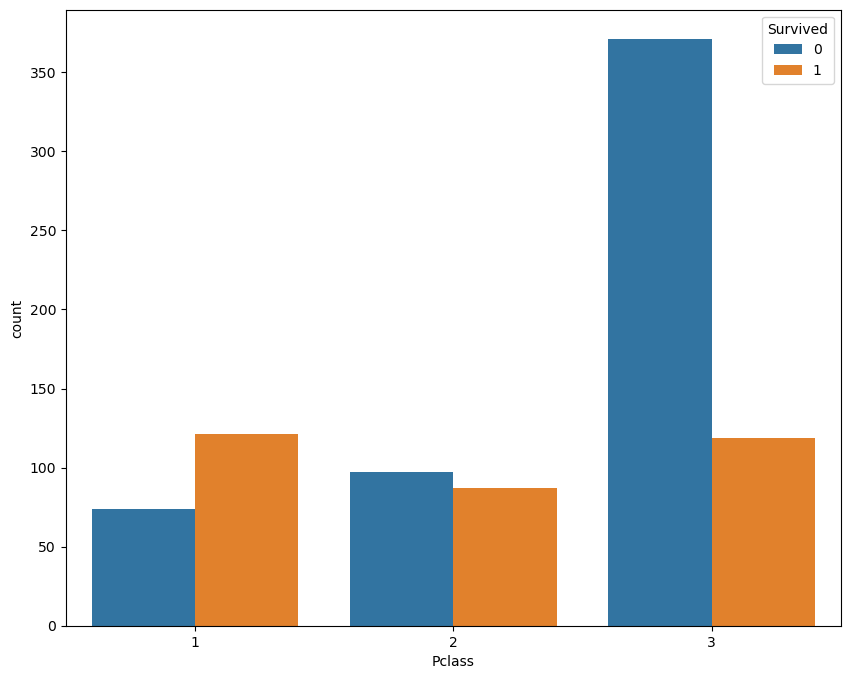

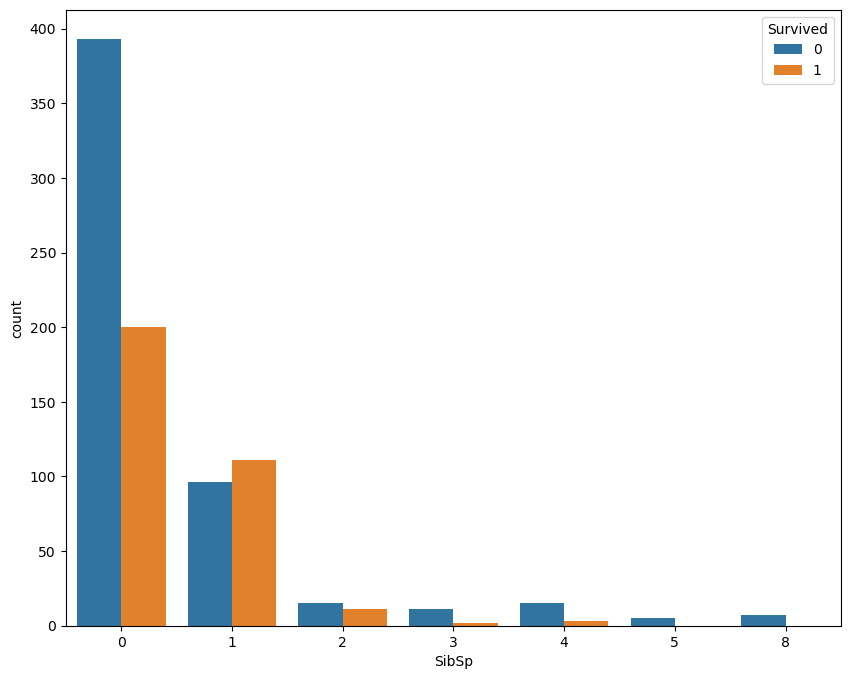

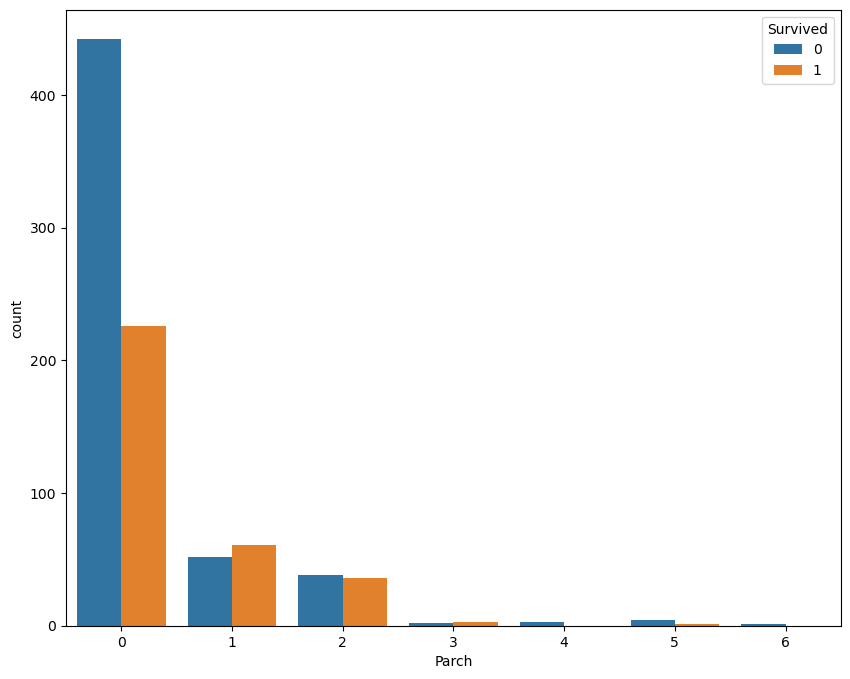

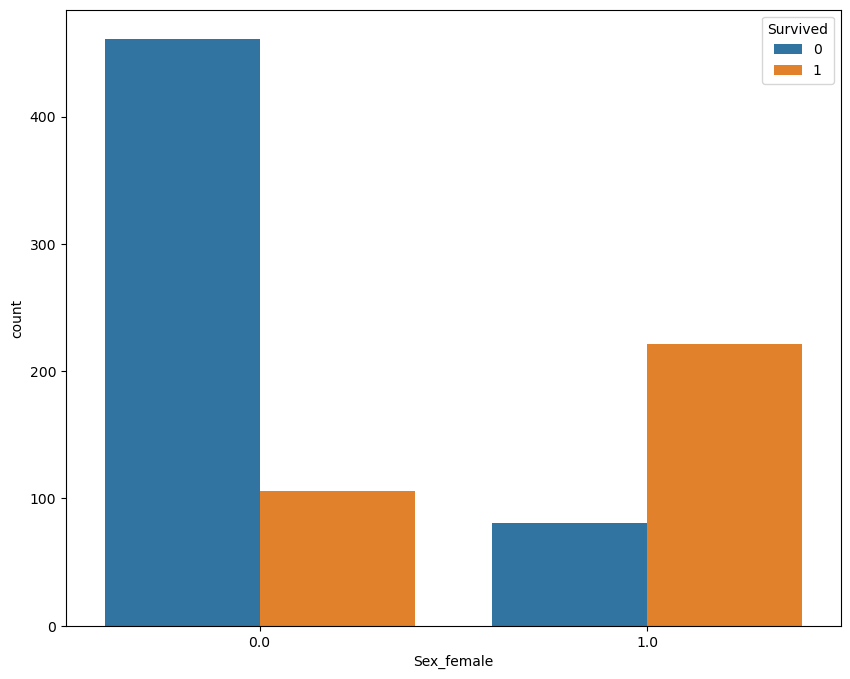

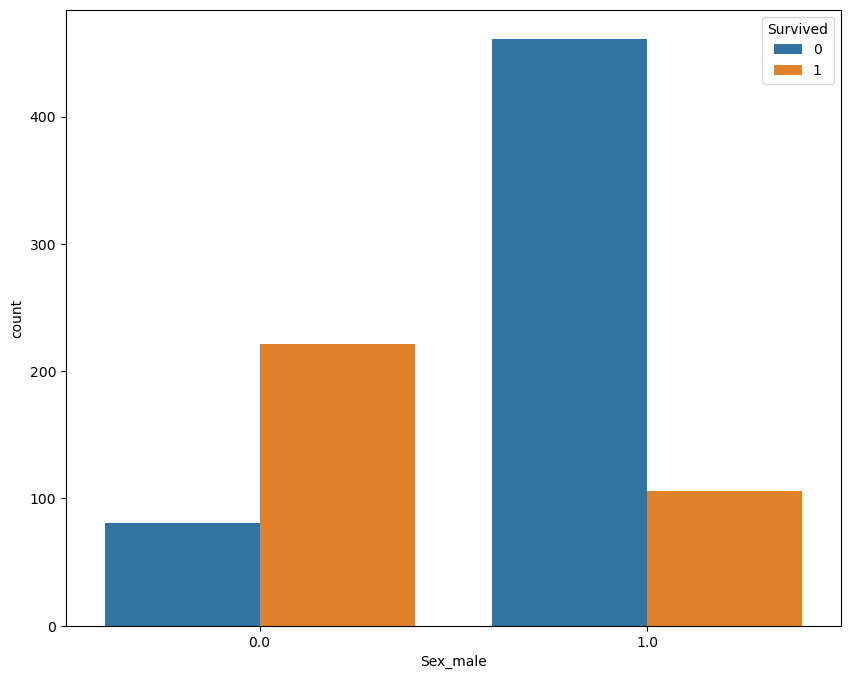

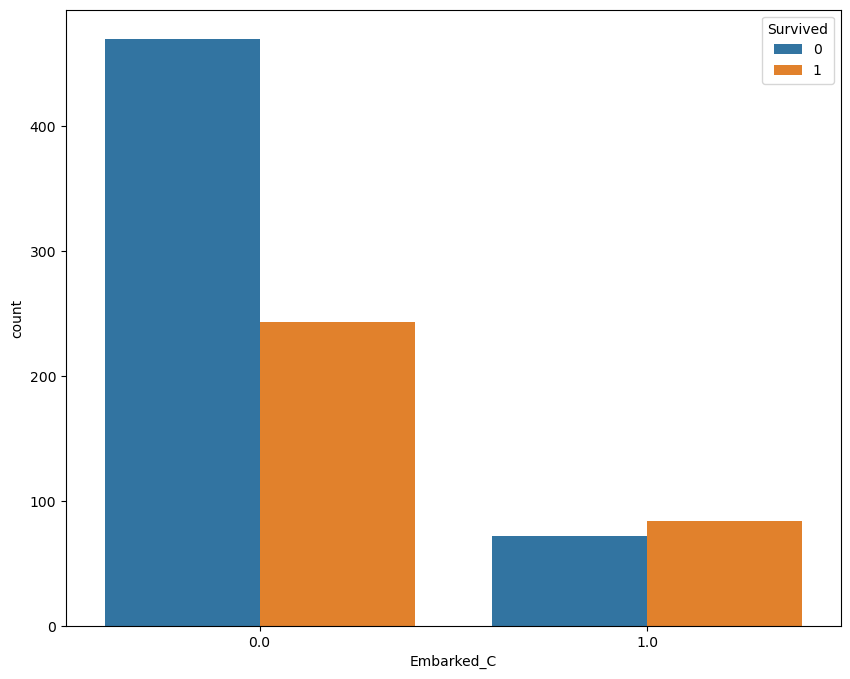

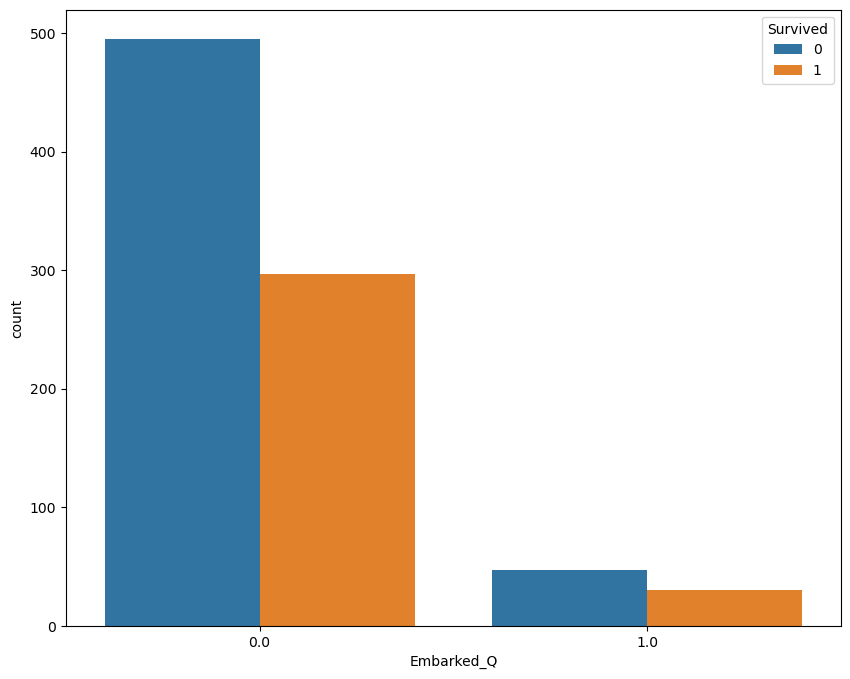

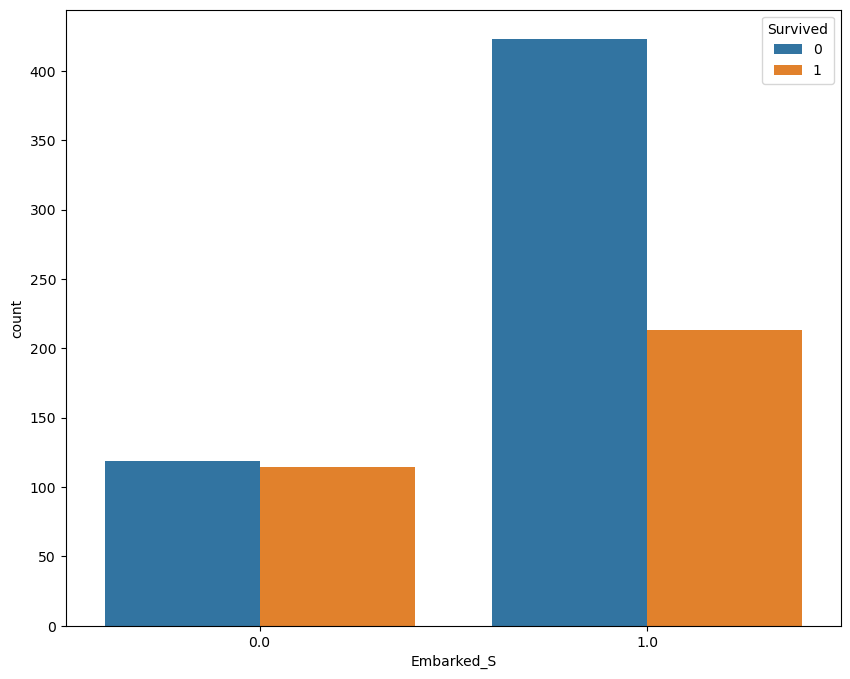

In [71]:
for col in cat_feature_x:
    plt.figure(figsize=(10,8))
    sns.countplot(x=col,data=df_stand, hue = "Survived")

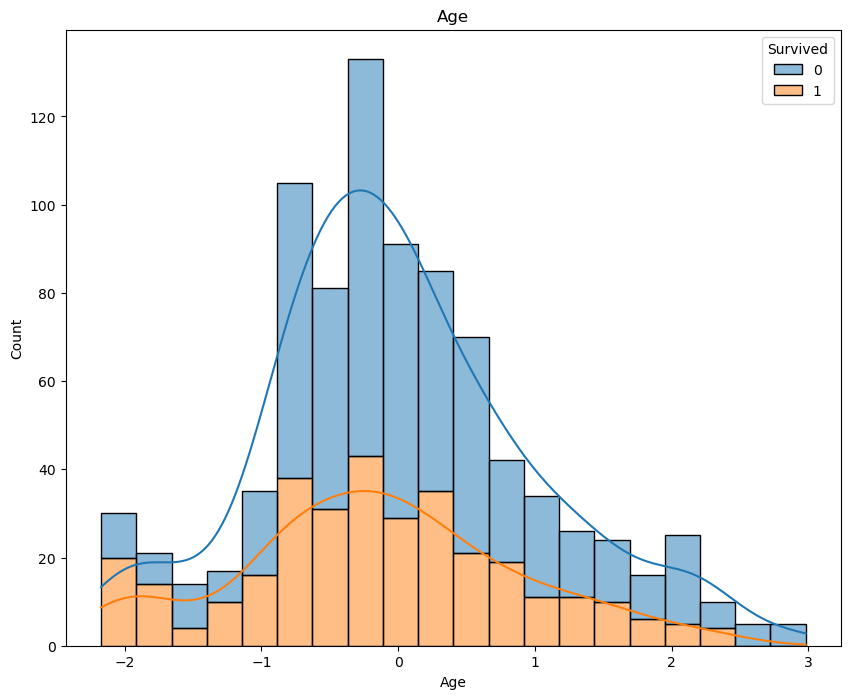

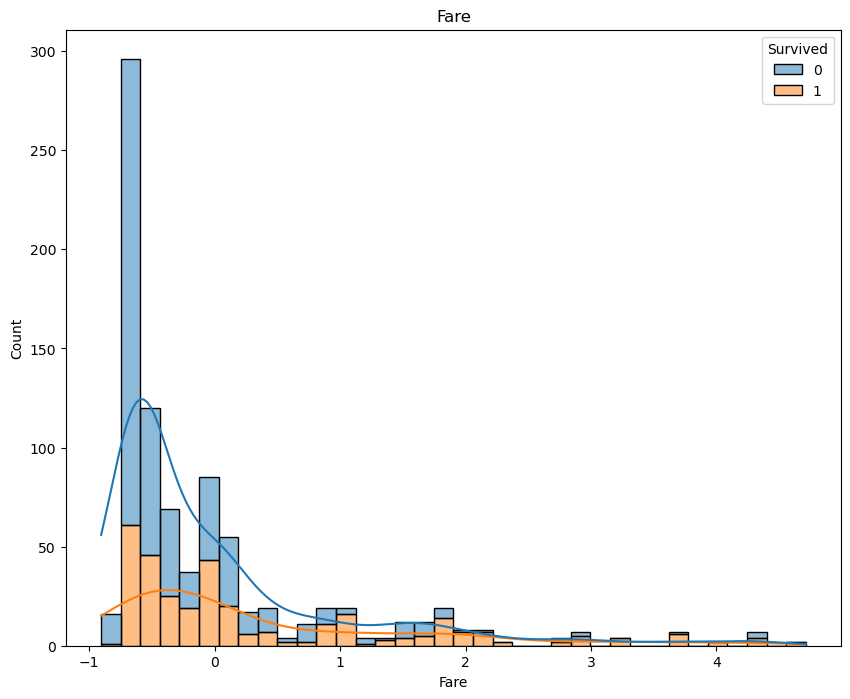

In [72]:
for col in num_feature_x:
    plt.figure(figsize=(10,8))
    plt.title(col)
    sns.histplot(data=df_stand, x=col, hue='Survived', kde=True, multiple="stack")

<Axes: xlabel='Survived', ylabel='count'>

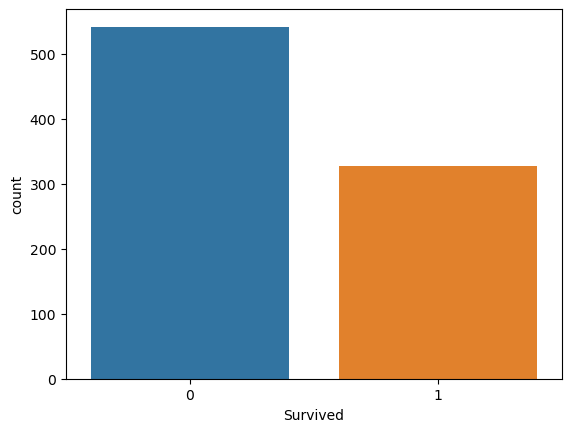

In [73]:
sns.countplot(x='Survived', data = df_y)

<Figure size 1000x800 with 0 Axes>

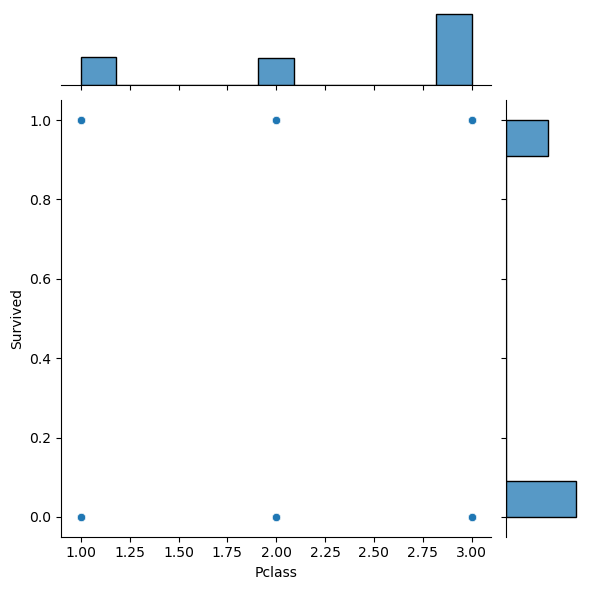

<Figure size 1000x800 with 0 Axes>

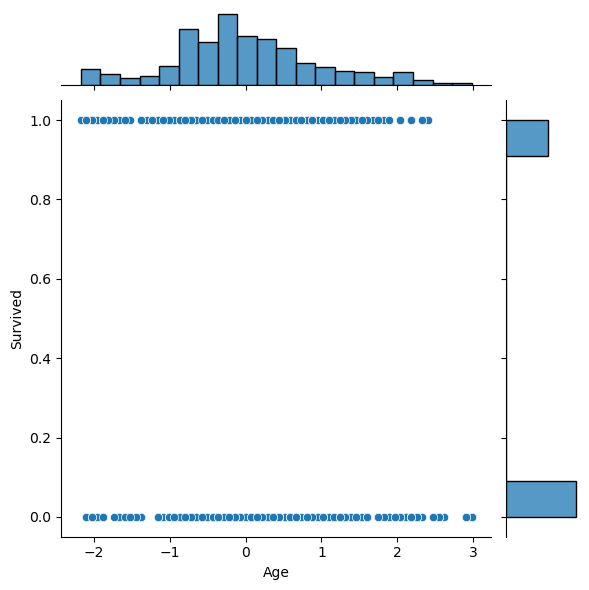

<Figure size 1000x800 with 0 Axes>

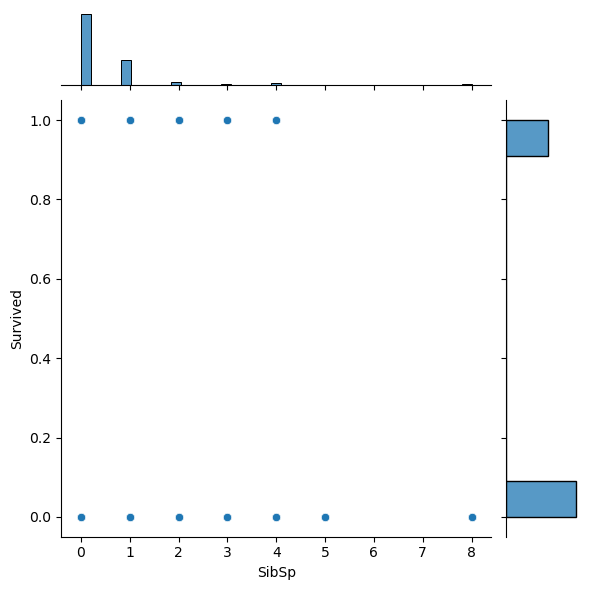

<Figure size 1000x800 with 0 Axes>

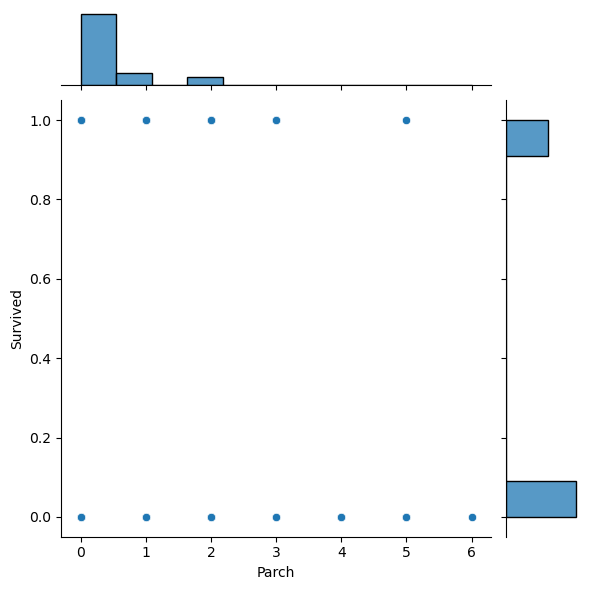

<Figure size 1000x800 with 0 Axes>

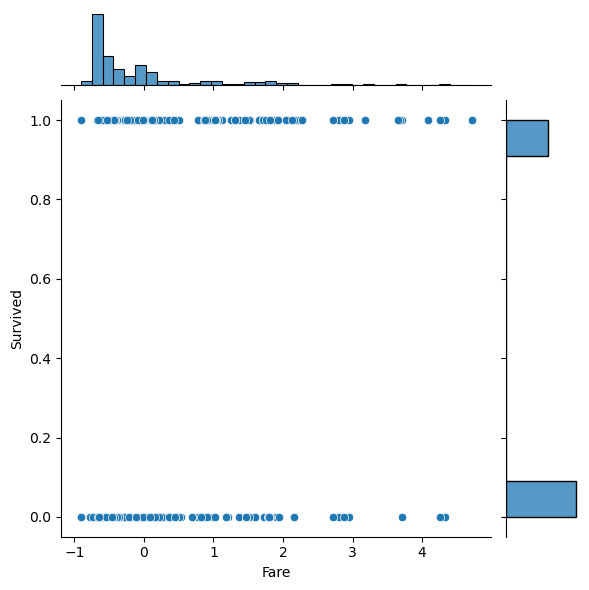

<Figure size 1000x800 with 0 Axes>

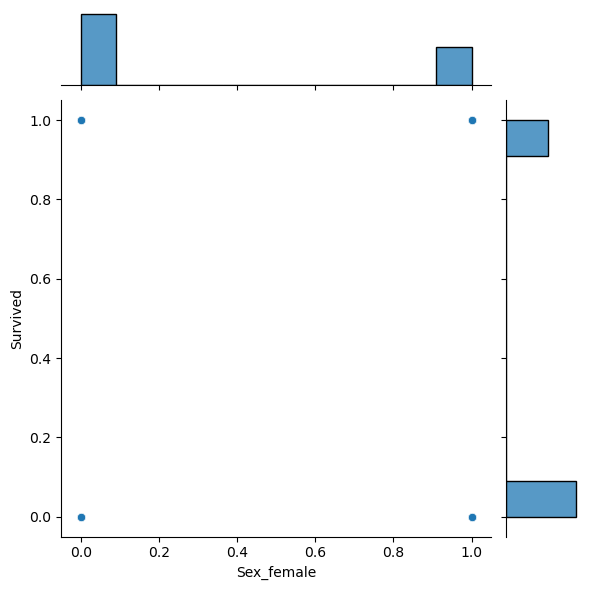

<Figure size 1000x800 with 0 Axes>

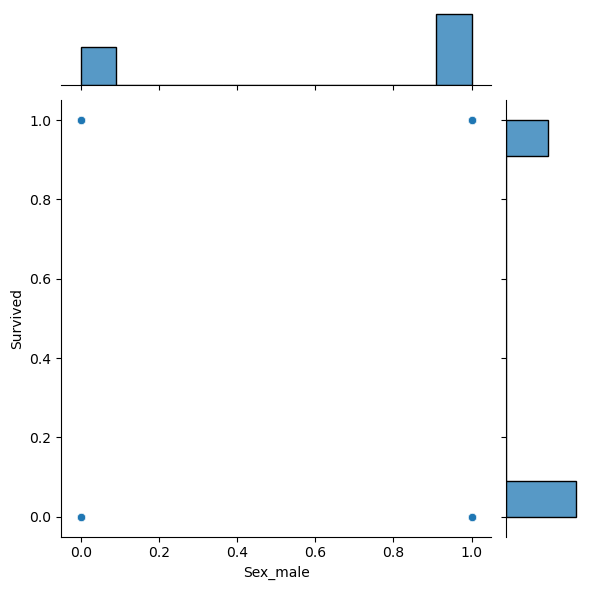

<Figure size 1000x800 with 0 Axes>

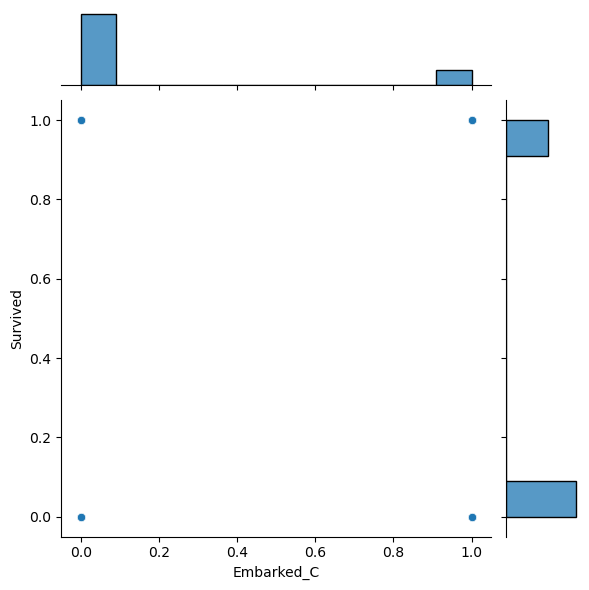

<Figure size 1000x800 with 0 Axes>

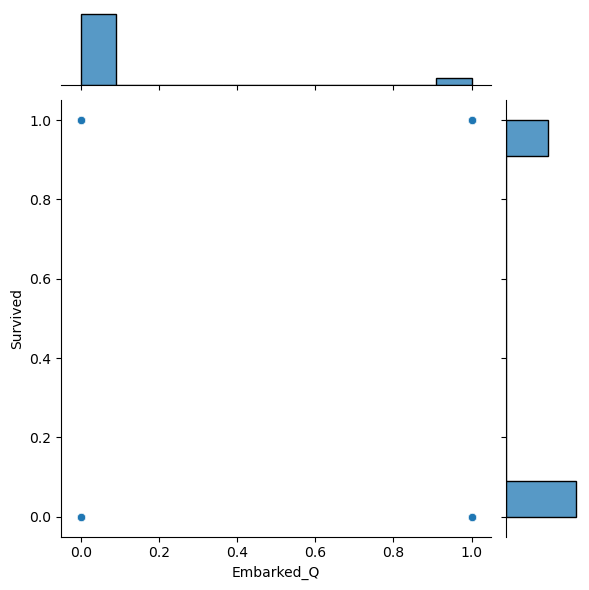

<Figure size 1000x800 with 0 Axes>

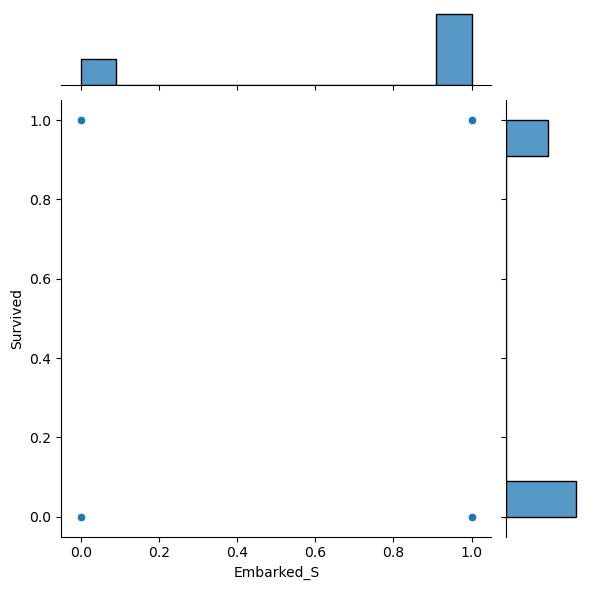

In [74]:
for col in df_x.columns:
    plt.figure(figsize=(10,8))
    sns.jointplot(data = df_stand, x = col, y = "Survived")

# Feature selection

In [75]:
Selector = SelectKBest(score_func = f_classif, k ='all')

In [76]:
numerical_feature = ["Age","SibSp","Parch","Fare"]

In [77]:
df_ftS = df_stand

In [78]:
Selector.fit_transform(df_ftS[numerical_feature],df_ftS["Survived"])

array([[-0.57560494,  1.        ,  0.        , -0.65725976],
       [ 0.5852902 ,  1.        ,  0.        ,  1.52364163],
       [-0.28538116,  0.        ,  0.        , -0.63427003],
       ...,
       [-0.3579371 ,  1.        ,  2.        , -0.10550618],
       [-0.28538116,  0.        ,  0.        ,  0.11757937],
       [ 0.14995452,  0.        ,  0.        , -0.64023033]])

In [79]:
scor_anova = Selector.scores_

<BarContainer object of 4 artists>

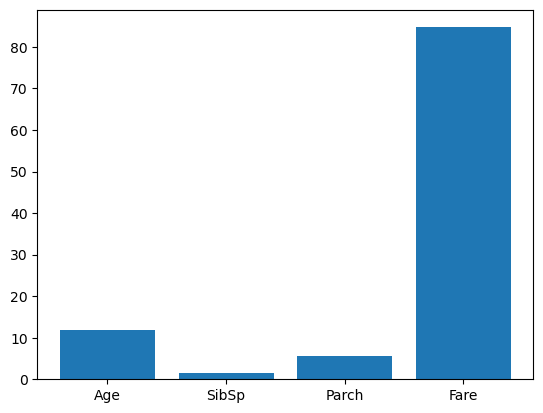

In [80]:
plt.bar(x=numerical_feature, height = scor_anova)

In [81]:
df_ftS = df_ftS.drop(["SibSp","Parch"], axis = 1)

In [82]:
df_ftS.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.575605,-0.657260,0.0,1.0,0.0,0.0,1.0
1,1,1,0.585290,1.523642,1.0,0.0,1.0,0.0,0.0
2,1,3,-0.285381,-0.634270,1.0,0.0,0.0,0.0,1.0
3,1,1,0.367622,0.904339,1.0,0.0,0.0,0.0,1.0
4,0,3,0.367622,-0.630013,0.0,1.0,0.0,0.0,1.0


In [83]:
Selector2 = SelectKBest(score_func = chi2, k ='all')

In [84]:
Selector2.fit_transform(df_ftS[['Sex_female', 'Sex_male','Embarked_C','Embarked_Q','Embarked_S']], df_ftS['Survived'])

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [85]:
Selector2.scores_

array([1.62615806e+02, 8.66137097e+01, 1.74800147e+01, 5.81724887e-02,
       4.64213804e+00])

# Modelling

In [86]:
df_y.dtypes

Survived    int64
dtype: object

In [87]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2)

In [88]:
print("Shapes: \nX_train: " + str(x_train.shape) + "\nX_test: " + str(x_test.shape) + "\nY_train: " + str(y_train.shape) + "\nY_test: " + str(y_test.shape))

Shapes: 
X_train: (695, 10)
X_test: (174, 10)
Y_train: (695, 1)
Y_test: (174, 1)


In [89]:
Est_knn = KNeighborsClassifier()
Est_LogR  = LogisticRegression()
Est_Dtree = DecisionTreeClassifier()
Est_svm = svm.SVC()
Est_RFor = RandomForestClassifier()
Est_ABoost = AdaBoostClassifier()

In [90]:
knn_dict = {
    "Name" : "KNeighborsClassifier",
    "Estimateur" : Est_knn,
    "Paramgrid" : {"n_neighbors" : [2,3,4,5,6,7]}
}

In [91]:
LogR_dict = {
    "Name" : "LogisticRegression",
    "Estimateur" : Est_LogR,
    "Paramgrid" : {"solver" : ['liblinear'], "penalty" : ['l2'], "C" : [0.001,0.01,0.1,1.0]}
}

In [92]:
svm_dict = {
    "Name" : "SVM",
    "Estimateur" : Est_svm,
    "Paramgrid" : {"kernel" : ["linear","poly","rbf"], "C" : [0.001,0.01,0.1,1.0]}
}

In [93]:
Dtree_dict = {
    "Name" : "DecisionTreeClassifier",
    "Estimateur" : Est_Dtree,
    "Paramgrid" : {"criterion" : ['entropy','gini'], "max_depth": [None,3,4,5,6,7,8,9,10]}
}

In [94]:
RFor_dict = {
    "Name" : "RandomForestClassifier",
    "Estimateur" : Est_RFor,
    "Paramgrid" : {"criterion" : ['entropy','gini'], "max_depth": [None,3,4,5,6,7,8,9,10], 'n_estimators': [100, 150, 200]}
}

In [95]:
ABoost_dict = {
    "Name" : "AdaBoostClassifier",
    "Estimateur" : Est_ABoost,
    "Paramgrid" : {"algorithm": ["SAMME", "SAMME.R"], "n_estimators": [50,100,150,200]}
}

In [96]:
list_dict = [knn_dict,LogR_dict,svm_dict,Dtree_dict,RFor_dict,ABoost_dict]

In [97]:
Grid = {}
for x in list_dict:
    Grid[x["Name"]] = GridSearchCV(x["Estimateur"],x["Paramgrid"],cv=5)
    Grid[x["Name"]].fit(x_train,np.ravel(y_train))
    

In [98]:
Grid

{'KNeighborsClassifier': GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
              param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]}),
 'LogisticRegression': GridSearchCV(cv=5, estimator=LogisticRegression(),
              param_grid={'C': [0.001, 0.01, 0.1, 1.0], 'penalty': ['l2'],
                          'solver': ['liblinear']}),
 'SVM': GridSearchCV(cv=5, estimator=SVC(),
              param_grid={'C': [0.001, 0.01, 0.1, 1.0],
                          'kernel': ['linear', 'poly', 'rbf']}),
 'DecisionTreeClassifier': GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['entropy', 'gini'],
                          'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10]}),
 'RandomForestClassifier': GridSearchCV(cv=5, estimator=RandomForestClassifier(),
              param_grid={'criterion': ['entropy', 'gini'],
                          'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10],
                          'n_estimators': [100, 150, 200]}),
 

In [99]:
for x in list_dict:
    print(x["Name"] + ": " + str(Grid[x["Name"]].best_estimator_.score(x_test,np.ravel(y_test))) + "\n")

KNeighborsClassifier: 0.8620689655172413

LogisticRegression: 0.8908045977011494

SVM: 0.8850574712643678

DecisionTreeClassifier: 0.8218390804597702

RandomForestClassifier: 0.8908045977011494

AdaBoostClassifier: 0.8793103448275862

